In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
!pip install wrds
import wrds
from datetime import datetime, timedelta
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [ ]:
id_wrds = '**********'
conn = wrds.Connection(wrds_username=id_wrds)

In [ ]:
US_HOLIDAYS_2024 = [
    "20240101",  # New Year's Day
    "20240115",  # Martin Luther King Jr. Day
    "20240219",  # Presidents' Day
    "20240527",  # Memorial Day
    "20240704",  # Independence Day
    "20240902",  # Labor Day
    "20241128",  # Thanksgiving Day
    "20241225",  # Christmas Day
]

def generate_trading_days(start_date, end_date):
    trading_days = []
    current_date = start_date
    while current_date <= end_date:
        # Exclude weekends (Saturday=5, Sunday=6) and holidays
        date_str = current_date.strftime("%Y%m%d")
        if current_date.weekday() < 5 and date_str not in US_HOLIDAYS_2024:
            trading_days.append(date_str)
        current_date += timedelta(days=1)
    return trading_days


In [ ]:
# Define start and end dates
start_date = datetime(2024, 11, 5)
end_date = datetime(2024, 12, 5)

start_time = "09:30:00"
end_time = "16:00:00"

# Generate the list of trading days
trading_days = generate_trading_days(start_date, end_date)

symbols = ['AAPL']
# symbols = ['TESLA']

trading_days

['20241105',
 '20241106',
 '20241107',
 '20241108',
 '20241111',
 '20241112',
 '20241113',
 '20241114',
 '20241115',
 '20241118',
 '20241119',
 '20241120',
 '20241121',
 '20241122',
 '20241125',
 '20241126',
 '20241127',
 '20241129',
 '20241202',
 '20241203',
 '20241204',
 '20241205']

In [ ]:

# Query data for each trading day
dataframes = []
for trading_day in trading_days:
  for symbol in symbols:
      table = f"cqm_{trading_day}"  # Construct the table name dynamically
      query = f"""
          SELECT date, time_m, sym_root, bid, bidsiz, ask, asksiz
          FROM taqmsec.{table}
          WHERE SYM_ROOT = '{symbol}'
          AND natbbo_ind = '4'
          AND (ex = 'T' OR ex = 'Q')
          AND (qu_cond = 'R')
          AND time_m BETWEEN '{start_time}' AND '{end_time}'
      """
      print(query)
      try:
          print(f"Executing query for table {table} for {symbol}")
          data = conn.raw_sql(query)
          dataframes.append(data)
      except Exception as e:
          print(f"Error querying table {table}: {e}")

quotes_df = pd.concat(dataframes, ignore_index=True)
quotes_df.columns = [col.upper() for col in quotes_df.columns]
quotes_df


          SELECT date, time_m, sym_root, bid, bidsiz, ask, asksiz
          FROM taqmsec.cqm_20241028
          WHERE SYM_ROOT = 'TESLA'
          AND natbbo_ind = '4'
          AND (ex = 'T' OR ex = 'Q')
          AND (qu_cond = 'R')
          AND time_m BETWEEN '09:30:00' AND '16:00:00'
      
Executing query for table cqm_20241028 for TESLA

          SELECT date, time_m, sym_root, bid, bidsiz, ask, asksiz
          FROM taqmsec.cqm_20241029
          WHERE SYM_ROOT = 'TESLA'
          AND natbbo_ind = '4'
          AND (ex = 'T' OR ex = 'Q')
          AND (qu_cond = 'R')
          AND time_m BETWEEN '09:30:00' AND '16:00:00'
      
Executing query for table cqm_20241029 for TESLA

          SELECT date, time_m, sym_root, bid, bidsiz, ask, asksiz
          FROM taqmsec.cqm_20241030
          WHERE SYM_ROOT = 'TESLA'
          AND natbbo_ind = '4'
          AND (ex = 'T' OR ex = 'Q')
          AND (qu_cond = 'R')
          AND time_m BETWEEN '09:30:00' AND '16:00:00'
      
Executin

,DATE,TIME_M,SYM_ROOT,BID,BIDSIZ,ASK,ASKSIZ


In [ ]:
dataframes = []

for trading_day in trading_days:
  for symbol in symbols:
      table = f"ctm_{trading_day}"  # Construct the table name dynamically
      query = f"""
          SELECT date, time_m, sym_root, size, price
          FROM taqmsec.{table}
          WHERE SYM_ROOT = '{symbol}'
          AND (ex = 'T' OR ex = 'Q')
          AND (CAST(tr_corr AS INT) <= 2)
          AND (tr_scond NOT SIMILAR TO '%%(O|Z|B|T|L|G|W|J|K)%%')
          AND time_m BETWEEN '{start_time}' AND '{end_time}'
      """
      try:
          print(f"Executing query for table {table} for {symbol}")
          data = conn.raw_sql(query)
          dataframes.append(data)
      except Exception as e:
          print(f"Error querying table {table}: {e}")

trades_df = pd.concat(dataframes, ignore_index=True)
trades_df.columns = [col.upper() for col in trades_df.columns]
trades_df

Executing query for table ctm_20241028 for AAPL
Executing query for table ctm_20241028 for TESLA
Executing query for table ctm_20241028 for AMZN
Executing query for table ctm_20241028 for MSFT
Executing query for table ctm_20241028 for NVDA
Executing query for table ctm_20241028 for META
Executing query for table ctm_20241028 for GOOG
Executing query for table ctm_20241029 for AAPL
Executing query for table ctm_20241029 for TESLA
Executing query for table ctm_20241029 for AMZN
Executing query for table ctm_20241029 for MSFT
Executing query for table ctm_20241029 for NVDA
Executing query for table ctm_20241029 for META
Executing query for table ctm_20241029 for GOOG
Executing query for table ctm_20241030 for AAPL
Executing query for table ctm_20241030 for TESLA
Executing query for table ctm_20241030 for AMZN
Executing query for table ctm_20241030 for MSFT
Executing query for table ctm_20241030 for NVDA
Executing query for table ctm_20241030 for META
Executing query for table ctm_2024103

<ipython-input-125-3d3d4016e65f>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trades_df = pd.concat(dataframes, ignore_index=True)


,DATE,TIME_M,SYM_ROOT,SIZE,PRICE
0,2024-10-28,09:30:00.511551,AAPL,457530,233.360
1,2024-10-28,09:30:00.511665,AAPL,100,233.340
2,2024-10-28,09:30:00.511789,AAPL,150,233.360
3,2024-10-28,09:30:00.511793,AAPL,158,233.360
4,2024-10-28,09:30:00.514199,AAPL,50,233.350
...,...,...,...,...,...
16399211,2024-11-27,15:29:50.668809,GOOG,22,169.220
16399212,2024-11-27,15:29:50.668812,GOOG,100,169.220
16399213,2024-11-27,15:29:50.668815,GOOG,1,169.220
16399214,2024-11-27,15:29:50.668817,GOOG,22,169.220


In [ ]:
aggregate_window = '10s'

In [ ]:
# Ensure datetime format for merging
quotes_df['DATETIME'] = pd.to_datetime(quotes_df['DATE'].astype('str') + ' ' + quotes_df['TIME_M'].astype('str'),errors='coerce')
trades_df['DATETIME'] = pd.to_datetime(trades_df['DATE'].astype('str') + ' ' + trades_df['TIME_M'].astype('str'),errors='coerce')
quotes_df.dropna(subset=['DATETIME'], inplace=True)
trades_df.dropna(subset=['DATETIME'], inplace=True)

# Merge trades with quotes on conditions
merged = pd.merge_asof(
    trades_df.sort_values('DATETIME'),
    quotes_df.sort_values('DATETIME'),
    on='DATETIME',
    by='SYM_ROOT',
    direction='backward',
    tolerance=pd.Timedelta('1s')  # Match within 1 second
)

# Apply conditions for trade direction
def determine_trade_direction(row):
    if row['PRICE'] >= row['ASK']:
        return 'BUY'
    elif row['PRICE'] <= row['BID']:
        return 'SELL'
    return 'UNKNOWN'

merged['TRADE_DIRECTION'] = merged.apply(determine_trade_direction, axis=1)

# Calculate trade imbalance
# For BUY trades, use SIZE; for SELL trades, use negative SIZE
merged['TRADE_IMBALANCE'] = merged.apply(
    lambda row: row['SIZE'] if row['TRADE_DIRECTION'] == 'BUY' else -row['SIZE'] if row['TRADE_DIRECTION'] == 'SELL' else 0,
    axis=1
)

# Aggregate trade imbalance over desired time intervals
# Example: Aggregate by minute


merged['DATETIME'] = merged['DATETIME'].dt.floor(aggregate_window)  # Adjust 'T' for other intervals
trade_imbalance_by_time = merged.groupby('DATETIME')['TRADE_IMBALANCE'].sum().reset_index()

trade_imbalance_by_time

,DATETIME,TRADE_IMBALANCE
0,2024-10-28 09:30:00,1699644
1,2024-10-28 09:30:01,-483708
2,2024-10-28 09:30:02,-884
3,2024-10-28 09:30:03,-342
4,2024-10-28 09:30:04,-53435
...,...,...
485548,2024-11-27 15:29:55,313
485549,2024-11-27 15:29:56,-845
485550,2024-11-27 15:29:57,0
485551,2024-11-27 15:29:58,0


In [ ]:
best_quote = quotes_df
best_quote['MID_PRICE'] = (best_quote['ASK'] + best_quote['BID']) / 2
best_quote['dp/tick'] = (best_quote['MID_PRICE']- best_quote['MID_PRICE'].shift(1))/0.01
best_quote['DATE'] = best_quote['DATE'].astype(str)
best_quote['TIME_M'] = best_quote['TIME_M'].astype(str)
best_quote['DATETIME'] = pd.to_datetime(best_quote['DATE'] + ' ' + best_quote['TIME_M'],errors='coerce')
best_quote['dt'] = (best_quote['DATETIME'] - best_quote['DATETIME'].shift(1)).dt.total_seconds()

In [ ]:
best_quote['dM'] = best_quote['MID_PRICE']- best_quote['MID_PRICE'].shift(1)
best_quote['OFI'] = ( (best_quote['BID']>=best_quote['BID'].shift(1))*best_quote['BIDSIZ'] -
                        (best_quote['BID']<=best_quote['BID'].shift(1))*best_quote['BIDSIZ'].shift(1)  -
                        (best_quote['ASK']<=best_quote['ASK'].shift(1))*best_quote['ASKSIZ'] +
                        (best_quote['ASK']>=best_quote['ASK'].shift(1))*best_quote['ASKSIZ'].shift(1) )

In [ ]:
best_quote

,DATE,TIME_M,SYM_ROOT,BID,BIDSIZ,ASK,ASKSIZ,DATETIME,MID_PRICE,dp/tick,dt,dM,OFI
0,2024-10-28,09:30:00.523032,AAPL,233.33,2,233.36,1,2024-10-28 09:30:00.523032,233.345,NaN,NaN,NaN,NaN
1,2024-10-28,09:30:00.717463,AAPL,233.33,2,233.34,1,2024-10-28 09:30:00.717463,233.335,-1.0,0.194431,-0.010,-1
2,2024-10-28,09:30:00.717470,AAPL,233.33,3,233.34,1,2024-10-28 09:30:00.717470,233.335,0.0,0.000007,0.000,1
3,2024-10-28,09:30:00.717625,AAPL,233.33,3,233.36,1,2024-10-28 09:30:00.717625,233.345,1.0,0.000155,0.010,1
4,2024-10-28,09:30:00.717638,AAPL,233.34,1,233.36,1,2024-10-28 09:30:00.717638,233.350,0.5,0.000013,0.005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285828,2024-11-27,15:29:25.058724,GOOG,169.20,1,169.21,1,2024-11-27 15:29:25.058724,169.205,0.0,0.021746,0.000,0
10285829,2024-11-27,15:29:34.485054,GOOG,169.18,3,169.19,3,2024-11-27 15:29:34.485054,169.185,-2.0,9.426330,-0.020,-4
10285830,2024-11-27,15:29:34.485262,GOOG,169.18,2,169.19,3,2024-11-27 15:29:34.485262,169.185,0.0,0.000208,0.000,-1
10285831,2024-11-27,15:29:46.627272,GOOG,169.23,1,169.24,1,2024-11-27 15:29:46.627272,169.235,5.0,12.142010,0.050,4


In [ ]:
best_quote[f'{aggregate_window}_window'] = best_quote['DATETIME'].dt.floor(aggregate_window).dt.time

aggregated_data = []

for (window, date), group in best_quote.groupby([f'{aggregate_window}_window', 'DATE']):
    first_mid_price = group['MID_PRICE'].iloc[0]
    last_mid_price = group['MID_PRICE'].iloc[-1]
    total_dp_tick = group['dp/tick'].sum()
    total_ofi = group['OFI'].sum()
    datetime_value = date + ' ' + str(window)
    # std_ofi = group['OFI'].std()

    # aggregated_data.append([datetime_value, first_mid_price, last_mid_price, total_dp_tick, total_ofi, std_ofi])
    aggregated_data.append([datetime_value, first_mid_price, last_mid_price, total_dp_tick, total_ofi])

# new_df = pd.DataFrame(aggregated_data, columns=['DATETIME', 'M0', 'Mt', 'dp/tick', 'OFI', 'std(OFI)'])
new_df = pd.DataFrame(aggregated_data, columns=['DATETIME', 'M0', 'Mt', 'dp/tick', 'OFI'])

new_df['DATETIME'] = pd.to_datetime(new_df['DATETIME'])
new_df = new_df.sort_values('DATETIME')
quote_data_resampled = new_df
quote_data_resampled

,DATETIME,M0,Mt,dp/tick,OFI
0,2024-10-28 09:30:00,233.345,168.580,-49550.0,82
23,2024-10-28 09:30:01,233.475,168.545,44112.5,414
46,2024-10-28 09:30:02,233.410,168.510,-88.5,-11
69,2024-10-28 09:30:03,233.490,168.365,-106.0,-81
92,2024-10-28 09:30:04,233.475,168.330,-22.5,-336
...,...,...,...,...,...
473904,2024-11-27 15:29:50,134.445,134.435,-2.0,-12
473988,2024-11-27 15:29:54,234.845,134.435,-4.5,-15
474010,2024-11-27 15:29:55,234.845,234.845,0.0,2
474033,2024-11-27 15:29:56,134.435,134.425,-1.0,-4


In [ ]:
quote_data_resampled_to_process= quote_data_resampled.merge(trade_imbalance_by_time, on='DATETIME', how='left')
quote_data_resampled_to_process['TRADE_IMBALANCE'] = quote_data_resampled_to_process['TRADE_IMBALANCE'].fillna(0)
quote_data_resampled_to_process

,DATETIME,M0,Mt,dp/tick,OFI,TRADE_IMBALANCE
0,2024-10-28 09:30:00,233.345,168.580,-49550.0,82,1699644.0
1,2024-10-28 09:30:01,233.475,168.545,44112.5,414,-483708.0
2,2024-10-28 09:30:02,233.410,168.510,-88.5,-11,-884.0
3,2024-10-28 09:30:03,233.490,168.365,-106.0,-81,-342.0
4,2024-10-28 09:30:04,233.475,168.330,-22.5,-336,-53435.0
...,...,...,...,...,...,...
474094,2024-11-27 15:29:50,134.445,134.435,-2.0,-12,28.0
474095,2024-11-27 15:29:54,234.845,134.435,-4.5,-15,200.0
474096,2024-11-27 15:29:55,234.845,234.845,0.0,2,313.0
474097,2024-11-27 15:29:56,134.435,134.425,-1.0,-4,-845.0


In [ ]:
slot_window = '10min'
quote_data_resampled_to_process[f'{slot_window}_slot'] = quote_data_resampled_to_process['DATETIME'].dt.floor(slot_window).dt.time
quote_data_resampled_to_process

,DATETIME,M0,Mt,dp/tick,OFI,TRADE_IMBALANCE,5min_slot
0,2024-10-28 09:30:00,233.345,168.580,-49550.0,82,1699644.0,09:30:00
1,2024-10-28 09:30:01,233.475,168.545,44112.5,414,-483708.0,09:30:00
2,2024-10-28 09:30:02,233.410,168.510,-88.5,-11,-884.0,09:30:00
3,2024-10-28 09:30:03,233.490,168.365,-106.0,-81,-342.0,09:30:00
4,2024-10-28 09:30:04,233.475,168.330,-22.5,-336,-53435.0,09:30:00
...,...,...,...,...,...,...,...
474094,2024-11-27 15:29:50,134.445,134.435,-2.0,-12,28.0,15:25:00
474095,2024-11-27 15:29:54,234.845,134.435,-4.5,-15,200.0,15:25:00
474096,2024-11-27 15:29:55,234.845,234.845,0.0,2,313.0,15:25:00
474097,2024-11-27 15:29:56,134.435,134.425,-1.0,-4,-845.0,15:25:00


In [ ]:
groups = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')
results = {}

for slot, group in groups:
    # Here 'group' is a subset of combined_data with all rows from all days
    # that fall into this particular 5-minute slot.

    # Independent variables: OFI and TRADE_IMBALANCE
    X = group[['OFI', 'TRADE_IMBALANCE']]
    y = group['dp/tick']   # Dependent variable

    x_ofi_low, x_ofi_high = X['OFI'].quantile(0.025), X['OFI'].quantile(0.975)
    x_ti_low, x_ti_high = X['TRADE_IMBALANCE'].quantile(0.025), X['TRADE_IMBALANCE'].quantile(0.975)
    y_low, y_high = y.quantile(0.025), y.quantile(0.975)

    # Filter the group to exclude values outside the 5%-95% range for both X and y
    mask = (X['OFI'] >= x_ofi_low) & (X['OFI'] <= x_ofi_high) & \
           (X['TRADE_IMBALANCE'] >= x_ti_low) & (X['TRADE_IMBALANCE'] <= x_ti_high) & \
           (y >= y_low) & (y <= y_high)
    filtered_group = group[mask]

    X_f = filtered_group[['OFI', 'TRADE_IMBALANCE']]
    y_f = filtered_group['dp/tick']

    # Add a constant to include an intercept
    X_f = sm.add_constant(X_f)

    # Fit the OLS model
    model = sm.OLS(y_f, X_f).fit()
    results[slot] = model

In [ ]:
for slot, model in results.items():
    print(f"Time Slot: {slot}")
    print(model.summary())
    print("-"*80)

Time Slot: 09:30:00
                            OLS Regression Results                            
Dep. Variable:                dp/tick   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1145.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:38:59   Log-Likelihood:                -25693.
No. Observations:                6126   AIC:                         5.139e+04
Df Residuals:                    6123   BIC:                         5.141e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

In [ ]:
# Extract regression results into a structured DataFrame
coefs = []

for slot, model in results.items():
    # Coefficients
    intercept = model.params['const']
    OFI_coef = model.params['OFI']
    TI_coef = model.params['TRADE_IMBALANCE']  # Trade Imbalance coefficient

    # T-values
    intercept_t = model.tvalues['const']
    OFI_t = model.tvalues['OFI']
    TI_t = model.tvalues['TRADE_IMBALANCE']  # Trade Imbalance t-value

    # R-squared
    r_squared = model.rsquared
    std_err_reg = np.sqrt(np.sum(model.resid**2) / model.df_resid)

    conf_int = model.conf_int(alpha=0.05)
    OFI_lower_ci = conf_int.loc['OFI', 0]
    OFI_upper_ci = conf_int.loc['OFI', 1]
    TI_lower_ci = conf_int.loc['TRADE_IMBALANCE', 0]  # Trade Imbalance lower CI
    TI_upper_ci = conf_int.loc['TRADE_IMBALANCE', 1]  # Trade Imbalance upper CI


    coefs.append({
        f'{slot_window}_slot': slot,
        'intercept': intercept,
        'OFI_coeff': OFI_coef,
        'TI_coeff': TI_coef,  # Add Trade Imbalance coefficient
        'intercept_t': intercept_t,
        'OFI_t': OFI_t,
        'TI_t': TI_t,  # Add Trade Imbalance t-value
        'R_squared': r_squared,
        'Std. Error OFI': model.bse['OFI'],
        'Std. Error TI': model.bse['TRADE_IMBALANCE'],  # Add Trade Imbalance Std. Error
        'Std. Error Regression': std_err_reg,
        'OFI_lower_ci': OFI_lower_ci,
        'OFI_upper_ci': OFI_upper_ci,
        'TI_lower_ci': TI_lower_ci,  # Add Trade Imbalance lower CI
        'TI_upper_ci': TI_upper_ci   # Add Trade Imbalance upper CI
    })

coefficients_df = pd.DataFrame(coefs).sort_values(f'{slot_window}_slot')
coefficients_df

,5min_slot,intercept,OFI_coeff,TI_coeff,intercept_t,OFI_t,TI_t,R_squared,Std. Error OFI,Std. Error TI,Std. Error Regression,OFI_lower_ci,OFI_upper_ci,TI_lower_ci,TI_upper_ci
0,09:30:00,0.262864,0.363514,0.000314,1.278952,39.130024,4.722477,0.272268,0.009290,0.000067,16.044471,0.345303,0.381726,0.000184,0.000445
1,09:35:00,0.496239,0.344126,0.000332,3.845314,46.925073,5.532246,0.359425,0.007334,0.000060,10.047088,0.329750,0.358502,0.000214,0.000449
2,09:40:00,0.712235,0.290449,0.000476,7.027644,47.566444,8.529493,0.383025,0.006106,0.000056,7.891237,0.278479,0.302420,0.000367,0.000585
3,09:45:00,0.459278,0.281988,0.000417,5.166028,49.802148,7.440693,0.392786,0.005662,0.000056,6.912198,0.270888,0.293088,0.000307,0.000527
4,09:50:00,0.028021,0.290847,0.000490,0.358478,53.604426,8.709983,0.445860,0.005426,0.000056,6.089856,0.280211,0.301484,0.000380,0.000600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,15:05:00,0.056945,0.158539,0.000262,2.155417,63.213493,5.612515,0.487133,0.002508,0.000047,2.032604,0.153622,0.163455,0.000170,0.000353
68,15:10:00,-0.000981,0.144648,0.000155,-0.040346,61.804267,3.404074,0.473497,0.002340,0.000046,1.856270,0.140060,0.149236,0.000066,0.000244
69,15:15:00,0.005510,0.144612,0.000251,0.220540,60.951862,5.612279,0.466090,0.002373,0.000045,1.908422,0.139961,0.149263,0.000163,0.000339
70,15:20:00,-0.011012,0.145801,0.000226,-0.441909,64.048038,5.274587,0.491754,0.002276,0.000043,1.913790,0.141339,0.150264,0.000142,0.000310


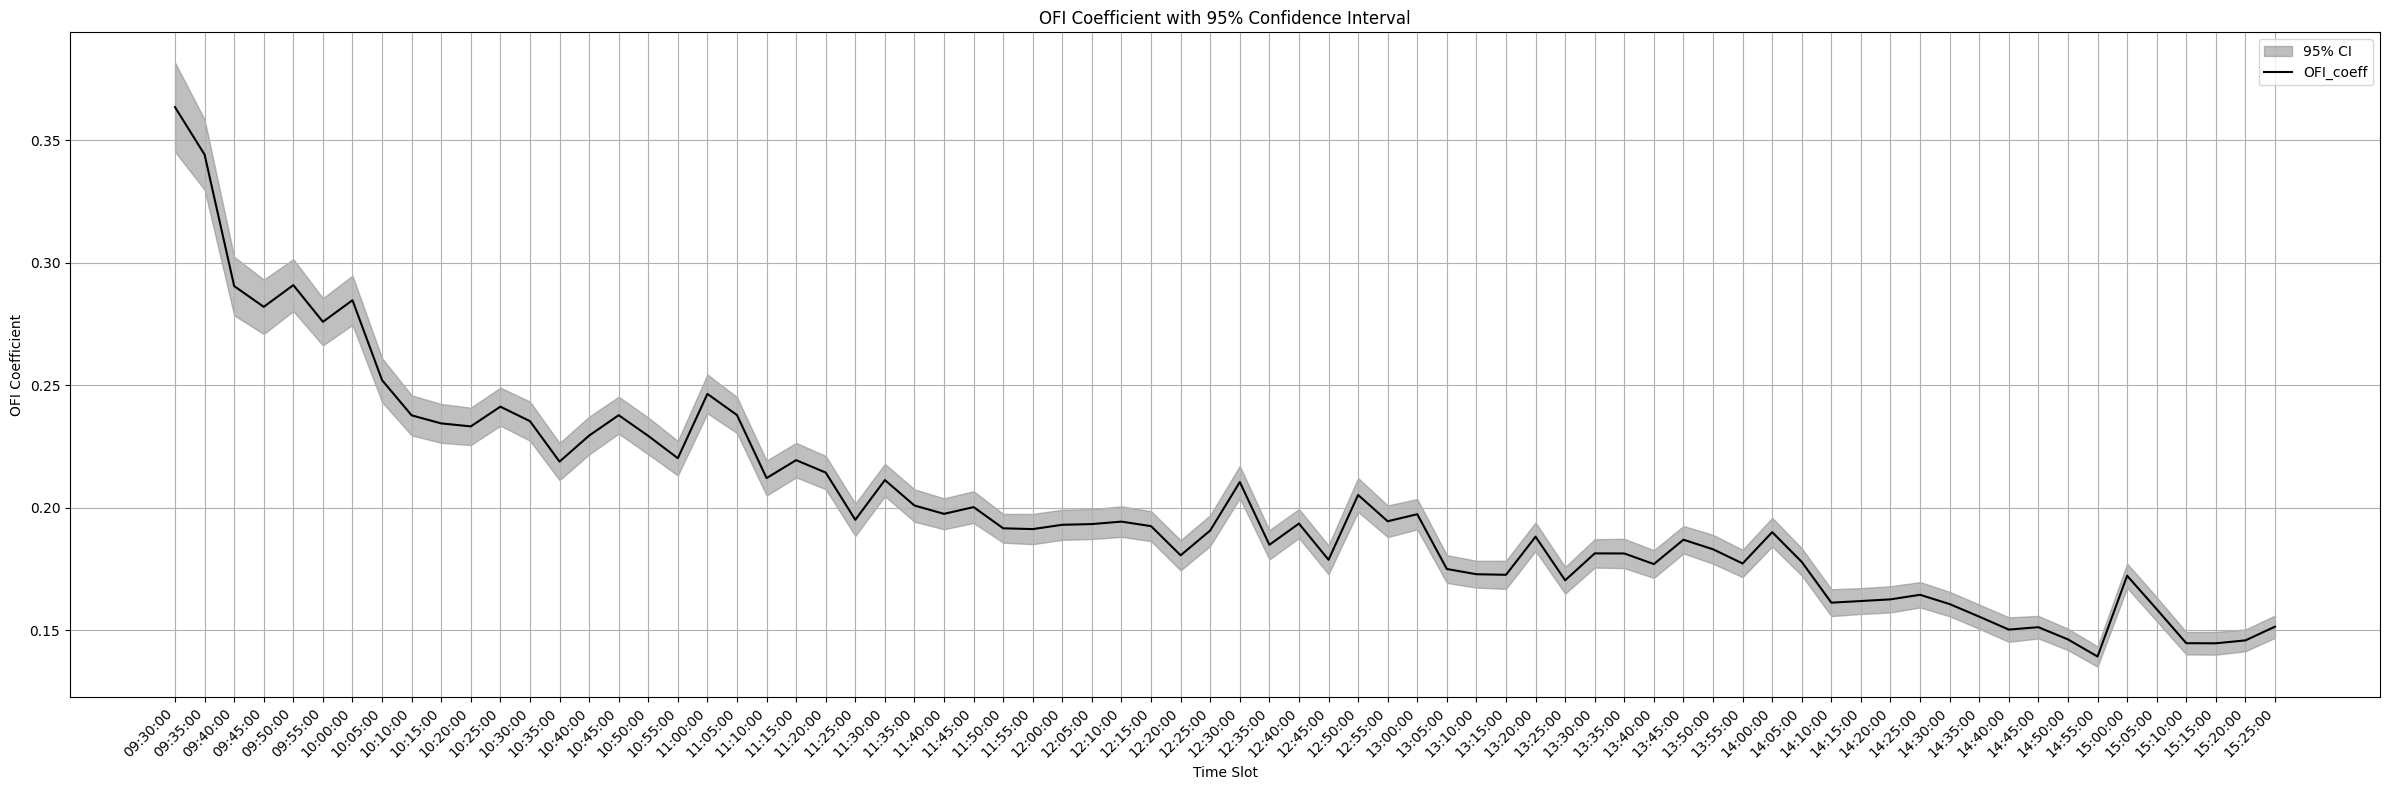

In [ ]:
# Assuming coefficients_df already has '10min_slot' and the other columns
coefficients_df[f'{slot_window}_slot'] = coefficients_df[f'{slot_window}_slot'].astype(str)
plt.figure(figsize=(24, 8))

plt.fill_between(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_lower_ci'], coefficients_df['OFI_upper_ci'], color='gray', alpha=0.5, label='95% CI')

# Plot OFI_coeff, OFI_lower_ci, and OFI_upper_ci
plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_coeff'], color='black', label='OFI_coeff')  # marker removed
# plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_lower_ci'], color='red', label='OFI_lower_ci')  # marker removed
# plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_upper_ci'], color='red', label='OFI_upper_ci')  # marker removed

plt.title('OFI Coefficient with 95% Confidence Interval')
plt.xlabel('Time Slot')
plt.ylabel('OFI Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

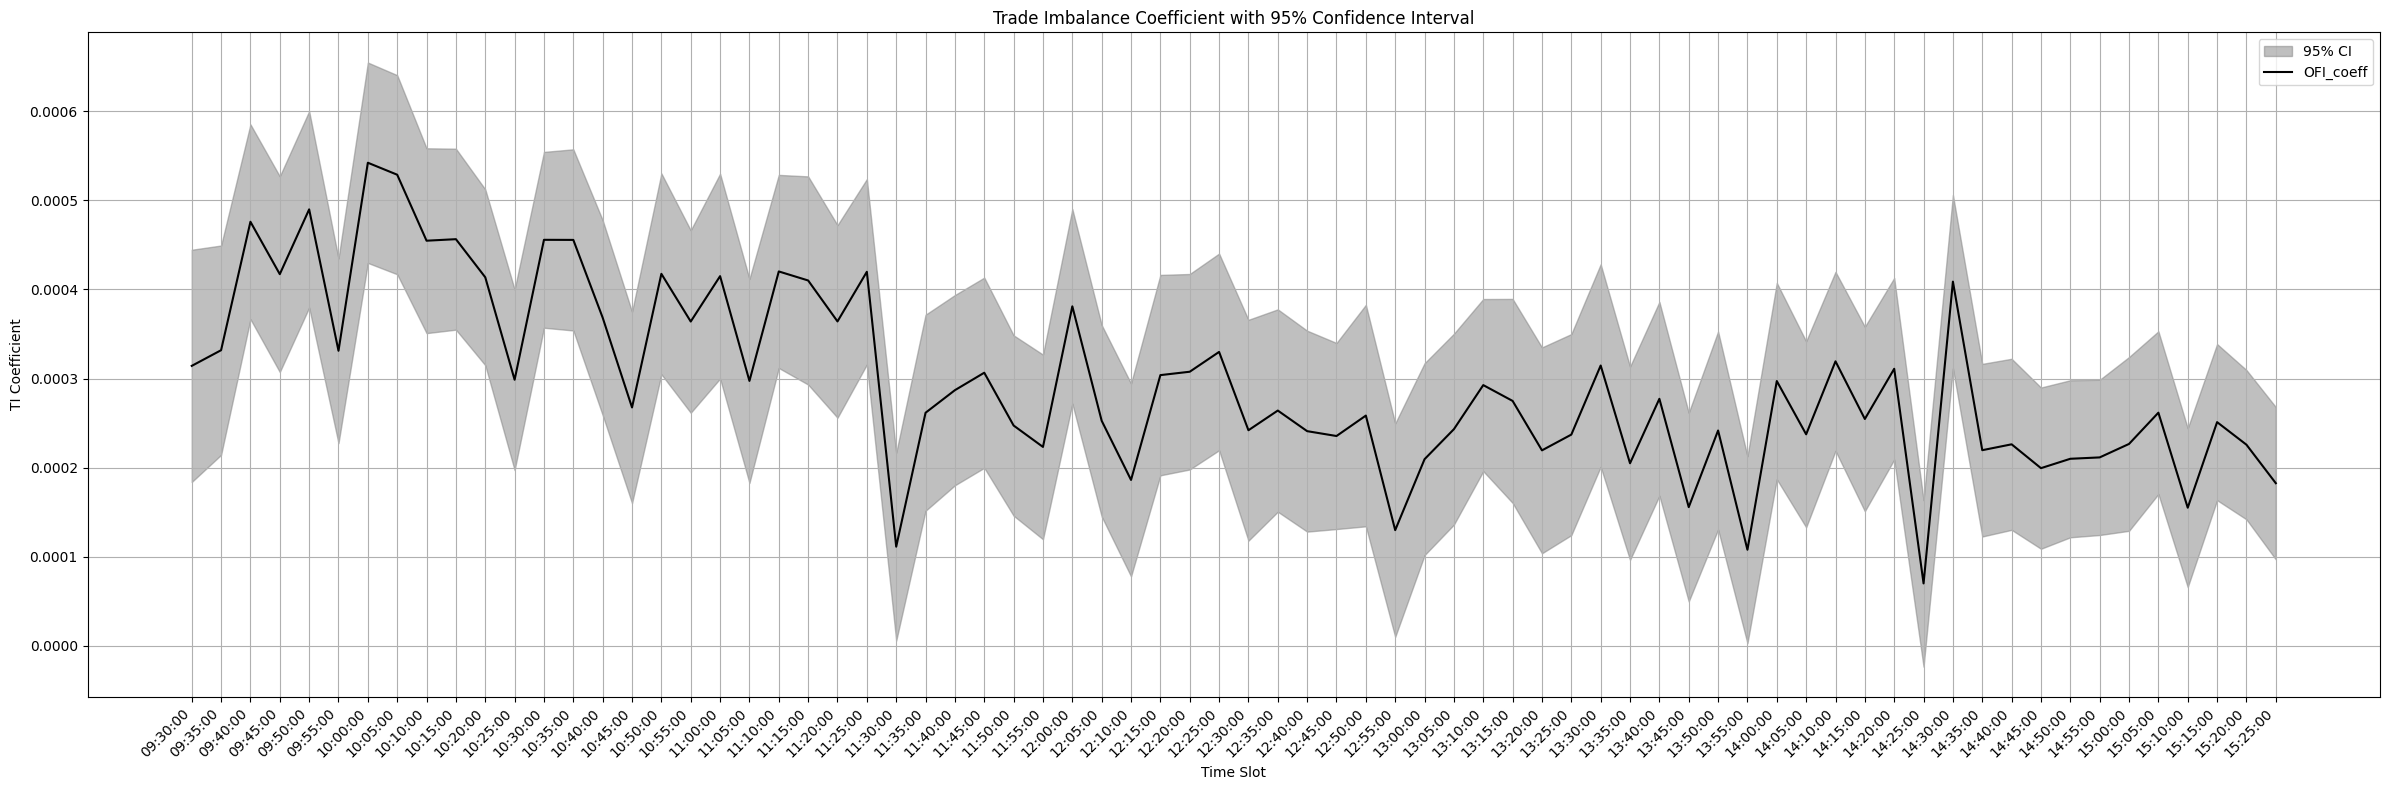

In [ ]:
# Assuming coefficients_df already has '10min_slot' and the other columns
coefficients_df[f'{slot_window}_slot'] = coefficients_df[f'{slot_window}_slot'].astype(str)
plt.figure(figsize=(24, 8))

plt.fill_between(coefficients_df[f'{slot_window}_slot'], coefficients_df['TI_lower_ci'], coefficients_df['TI_upper_ci'], color='gray', alpha=0.5, label='95% CI')

# Plot OFI_coeff, OFI_lower_ci, and OFI_upper_ci
plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['TI_coeff'], color='black', label='OFI_coeff')  # marker removed
# plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_lower_ci'], color='red', label='OFI_lower_ci')  # marker removed
# plt.plot(coefficients_df[f'{slot_window}_slot'], coefficients_df['OFI_upper_ci'], color='red', label='OFI_upper_ci')  # marker removed

plt.title('Trade Imbalance Coefficient with 95% Confidence Interval')
plt.xlabel('Time Slot')
plt.ylabel('TI Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
slots_stats = pd.DataFrame()
slots_stats['std(OFI)'] = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')['OFI'].std()
slots_stats['mean(OFI)'] = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')['OFI'].mean()
slots_stats['std(dp/tick)'] = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')['dp/tick'].std()
slots_stats['std(TI)'] = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')['TRADE_IMBALANCE'].std()  # Include std(TI)
slots_stats['mean(TI)'] = quote_data_resampled_to_process.groupby(f'{slot_window}_slot')['TRADE_IMBALANCE'].mean() # Include mean(TI)
slots_stats.reset_index(inplace=True)
slots_stats[f'{slot_window}_slot'] = slots_stats[f'{slot_window}_slot'].astype(str)
slots_stats

,5min_slot,std(OFI),mean(OFI),std(dp/tick),std(TI),mean(TI)
0,09:30:00,107.235391,-1.645030,2533.684595,136515.289221,523.663368
1,09:35:00,57.687249,-2.339779,18.873641,8619.746040,-207.095377
2,09:40:00,49.333154,-2.992732,15.747099,7174.942131,-289.676261
3,09:45:00,50.810316,-2.144044,14.930658,8591.490417,-247.953929
4,09:50:00,45.208993,-2.216940,14.058340,5732.464106,-179.250585
...,...,...,...,...,...,...
67,15:05:00,37.684906,1.153194,5.848980,4008.499926,65.057675
68,15:10:00,22.152742,0.271501,5.200438,1680.575668,-18.400429
69,15:15:00,22.491499,0.340644,4.798622,1784.977828,13.055061
70,15:20:00,22.681939,-0.619474,5.249000,1943.418234,-23.481847


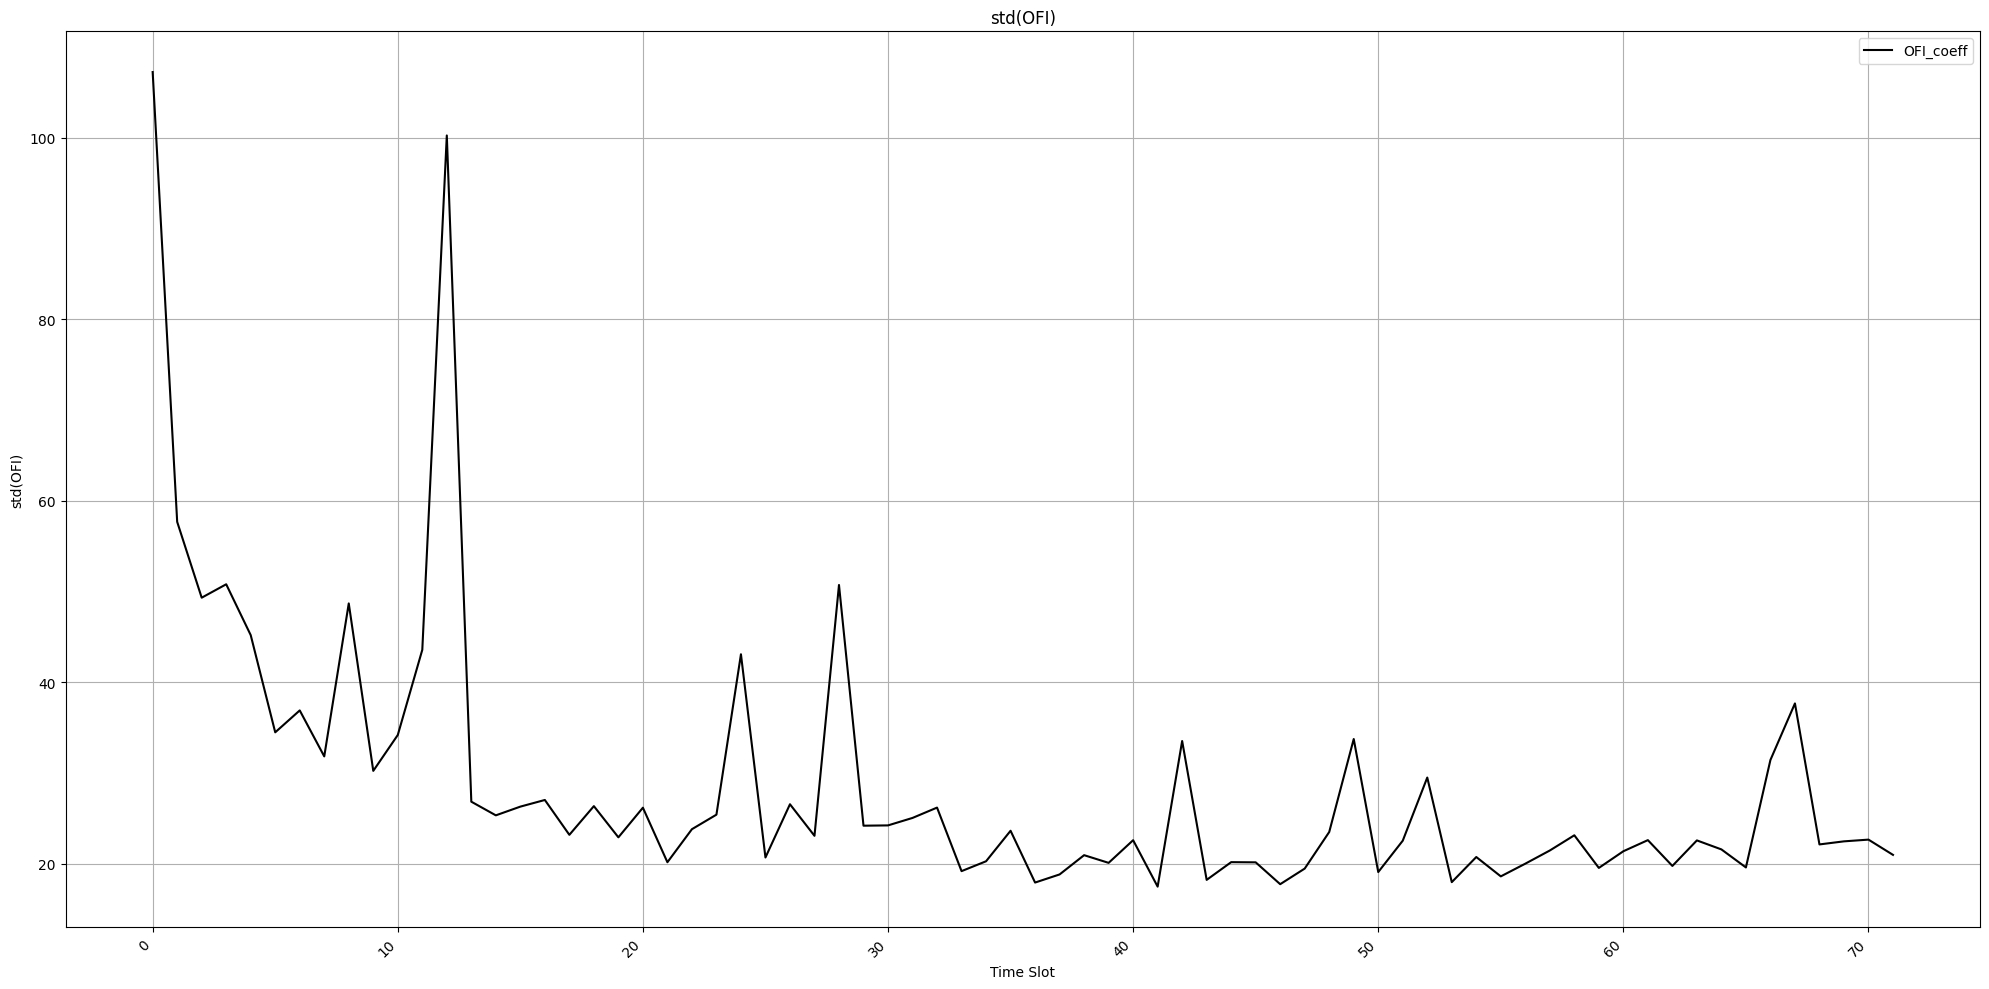

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(slots_stats['std(OFI)'], color='black', label='OFI_coeff')  # marker removed

plt.title('std(OFI)')
plt.xlabel('Time Slot')
plt.ylabel('std(OFI)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

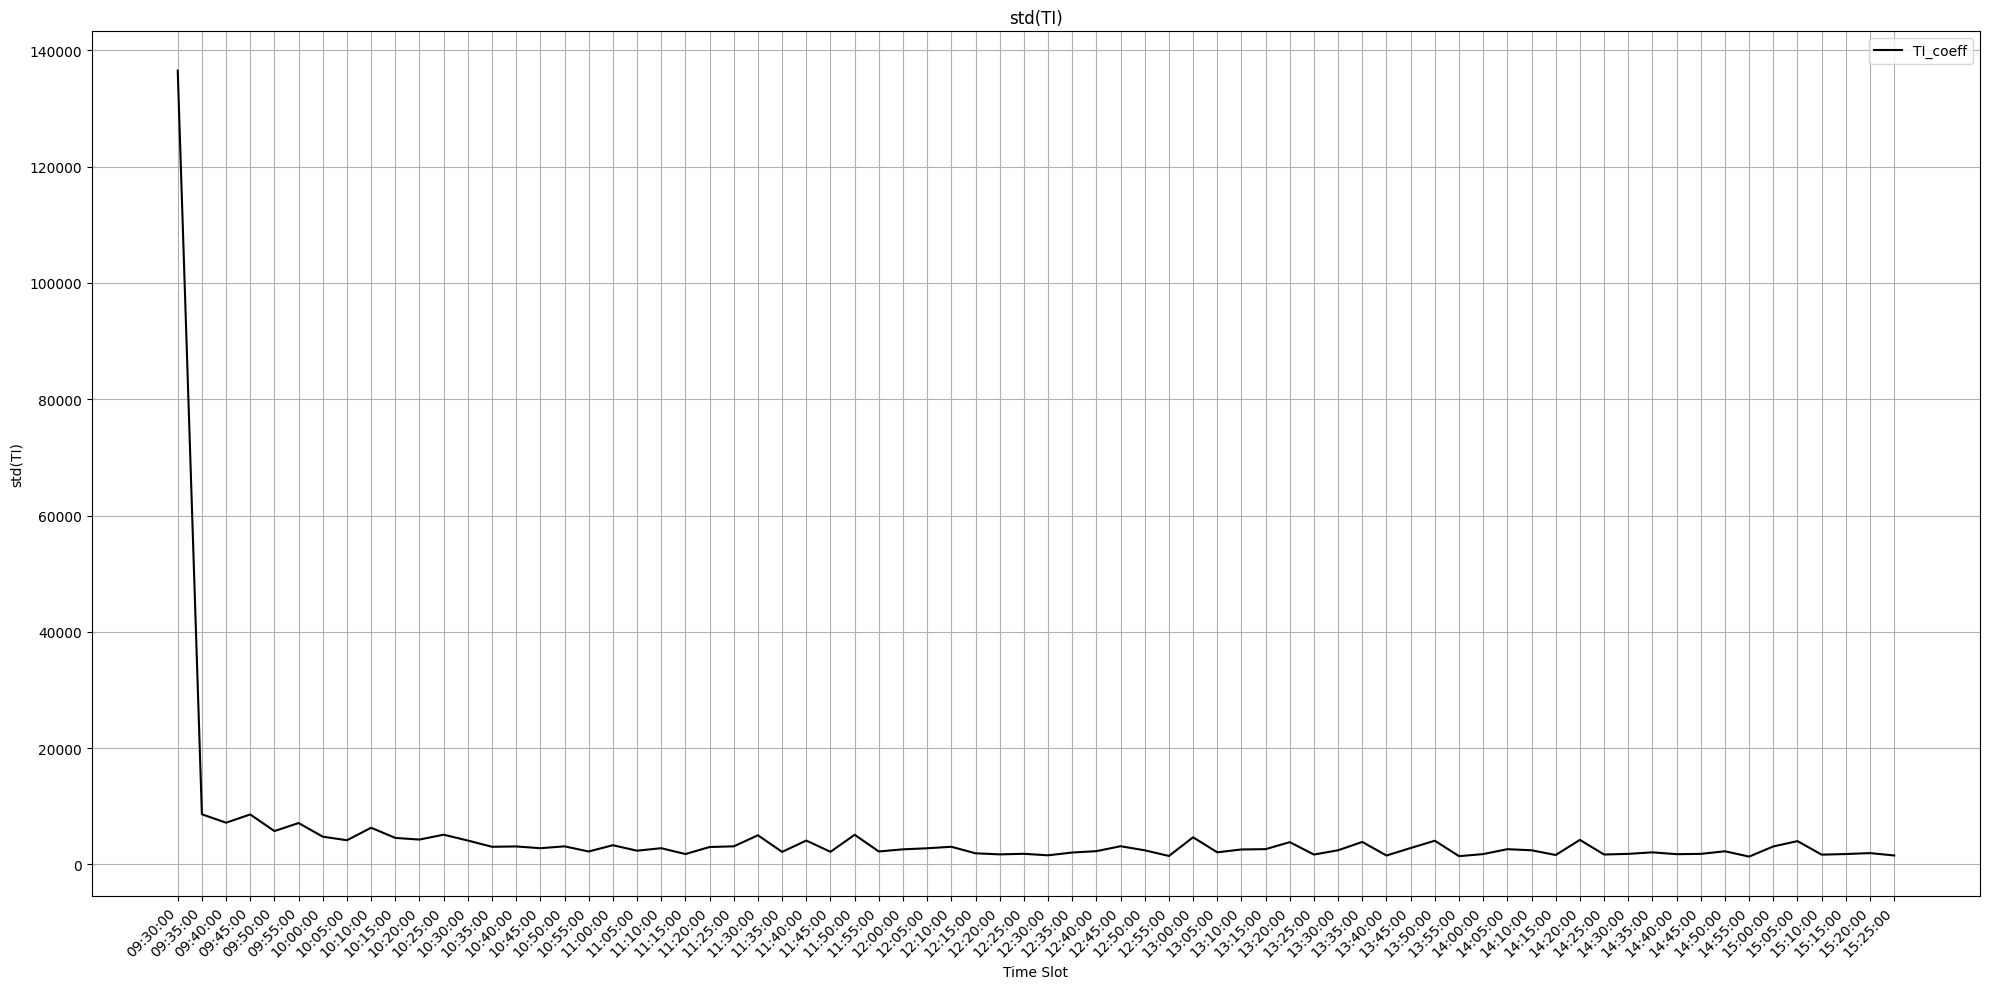

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(slots_stats[f'{slot_window}_slot'], slots_stats['std(TI)'], color='black', label='TI_coeff')

plt.title('std(TI)')  # Updated title
plt.xlabel('Time Slot')
plt.ylabel('std(TI)')  # Updated y-axis label
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

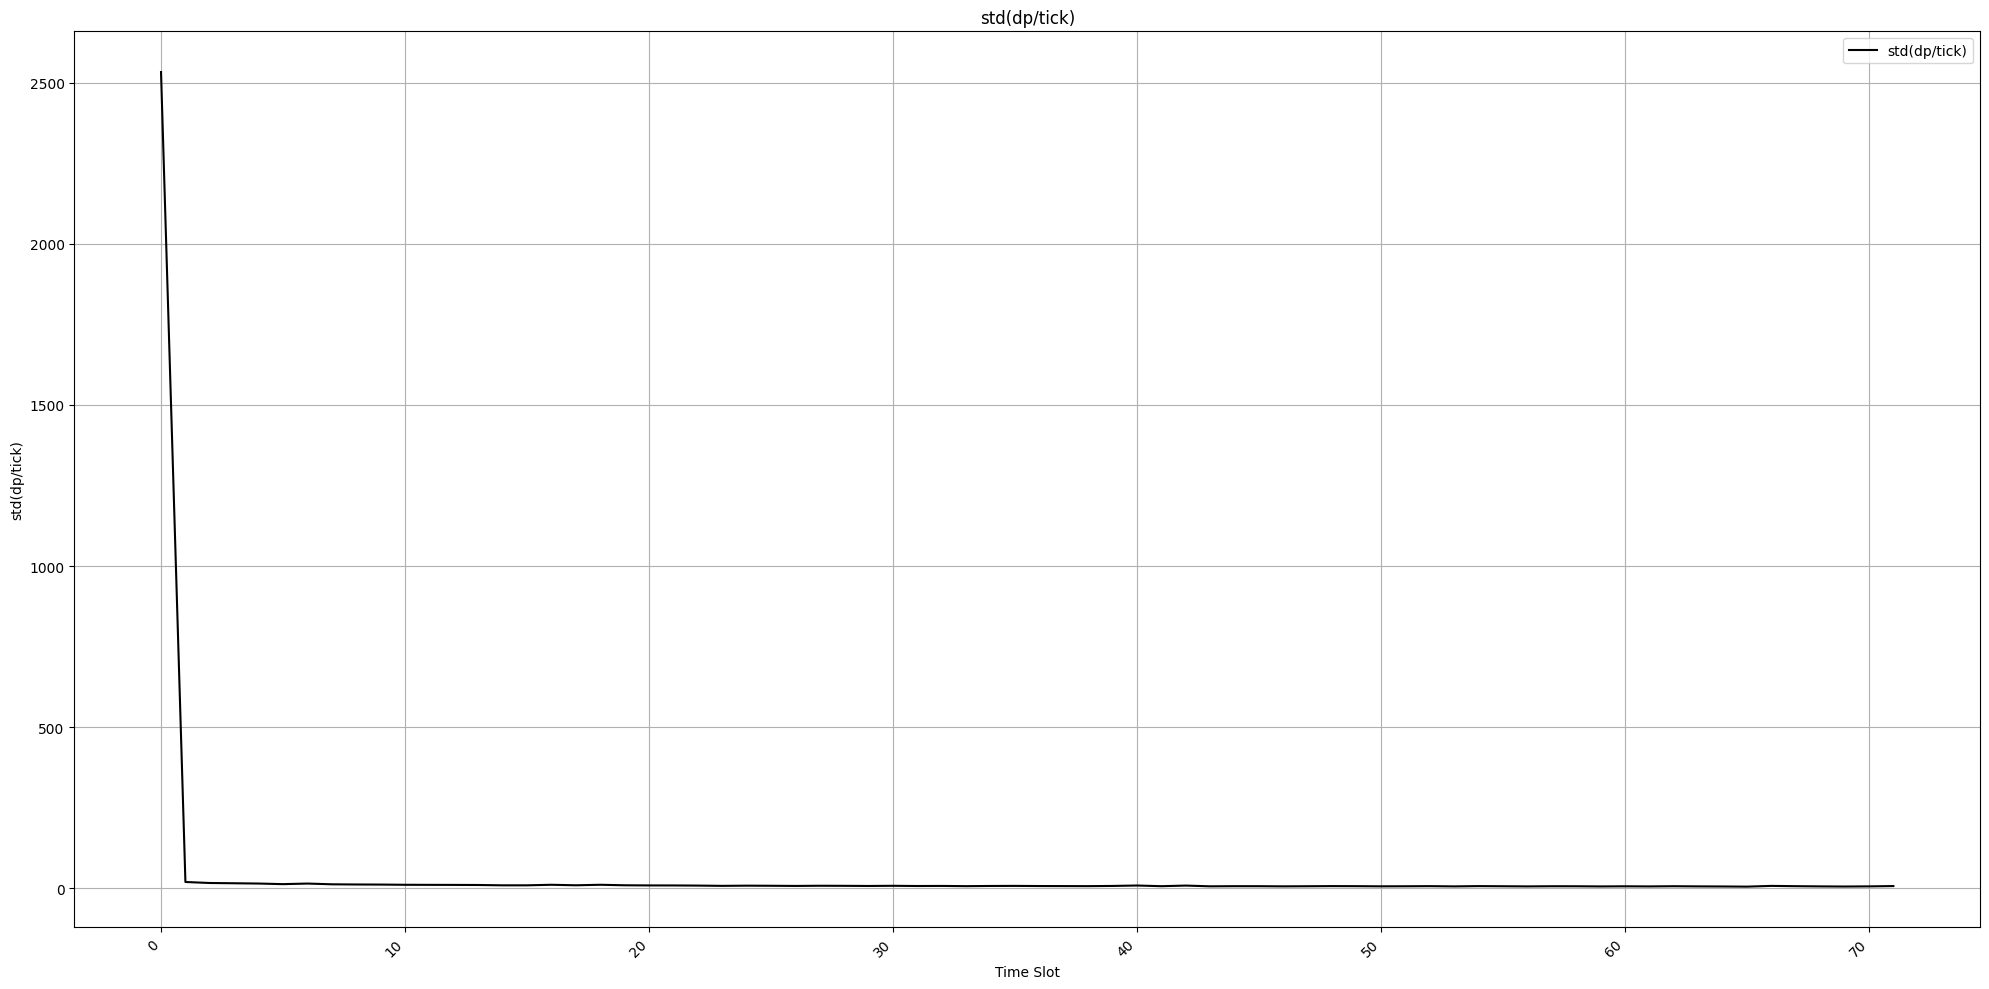

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(slots_stats['std(dp/tick)'], color='black', label='std(dp/tick)')

plt.title('std(dp/tick)')
plt.xlabel('Time Slot')
plt.ylabel('std(dp/tick)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

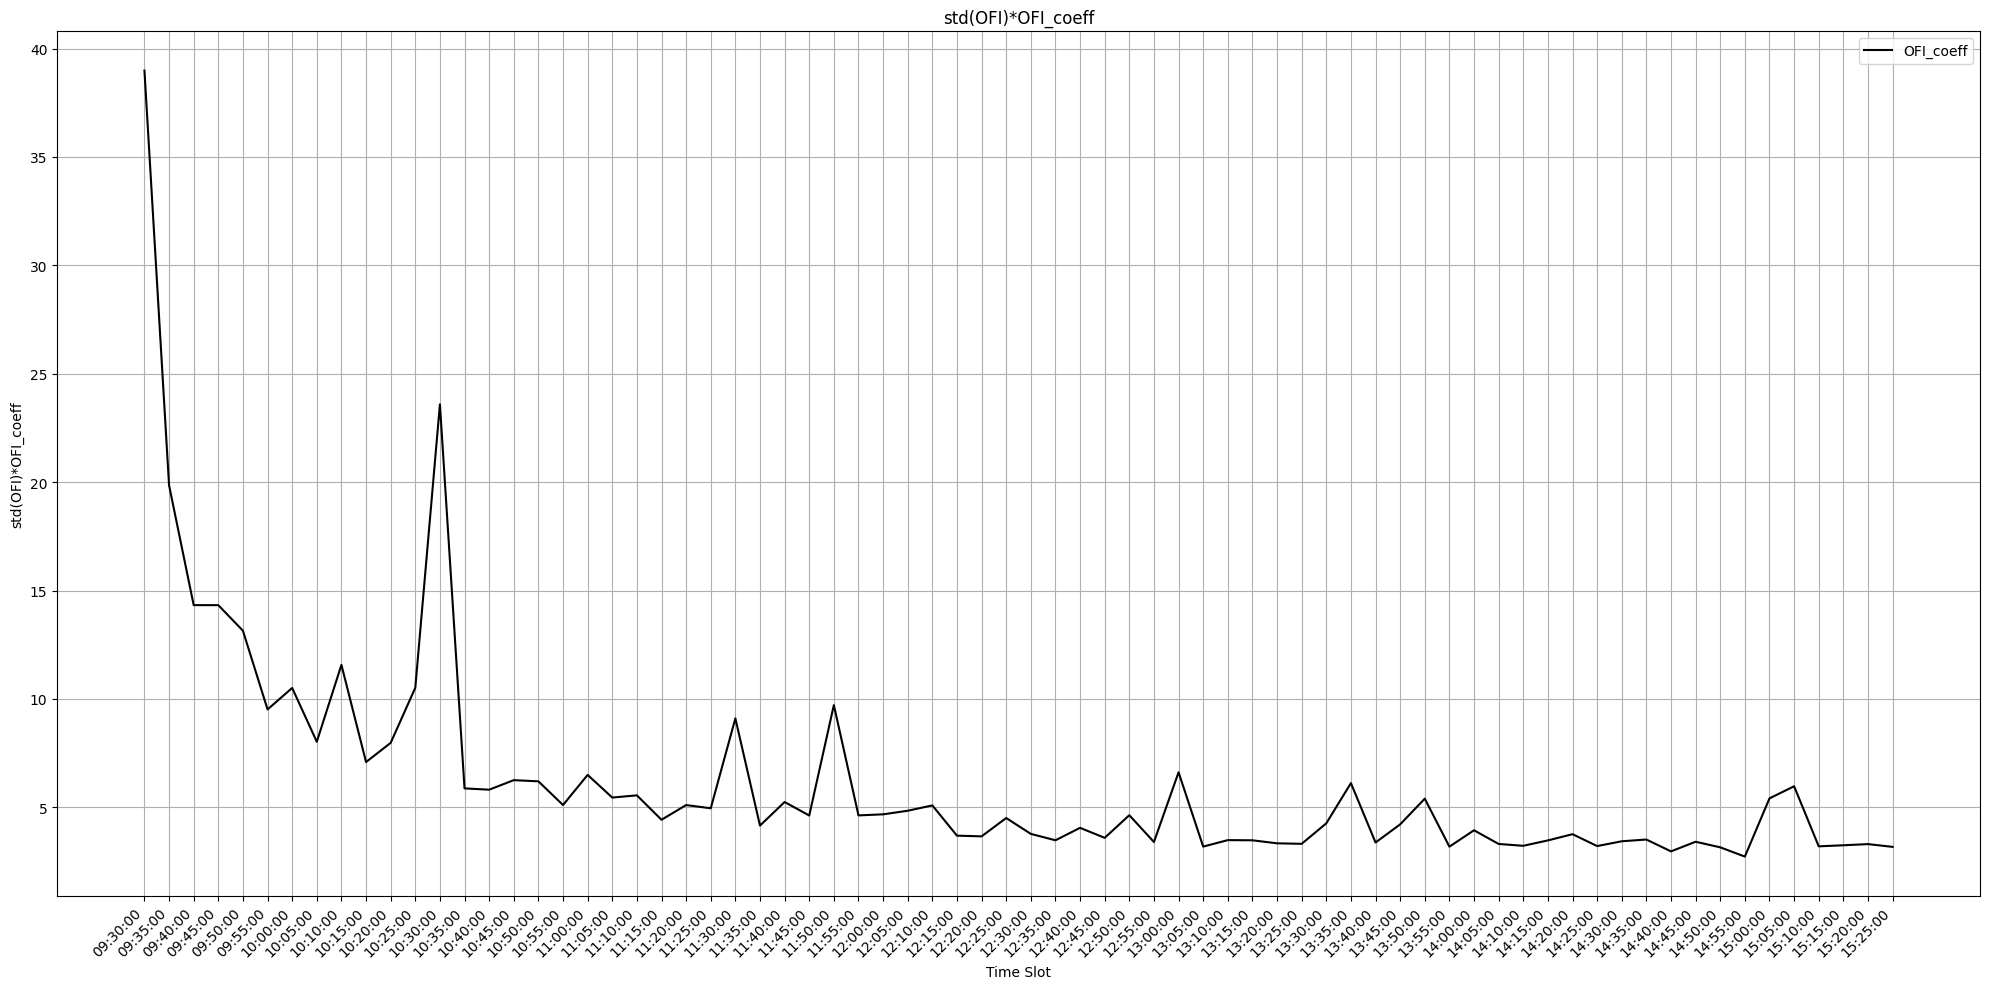

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(slots_stats[f'{slot_window}_slot'],slots_stats['std(OFI)']*coefficients_df['OFI_coeff'], color='black', label='OFI_coeff')  # marker removed

plt.title('std(OFI)*OFI_coeff')
plt.xlabel('Time Slot')
plt.ylabel('std(OFI)*OFI_coeff')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

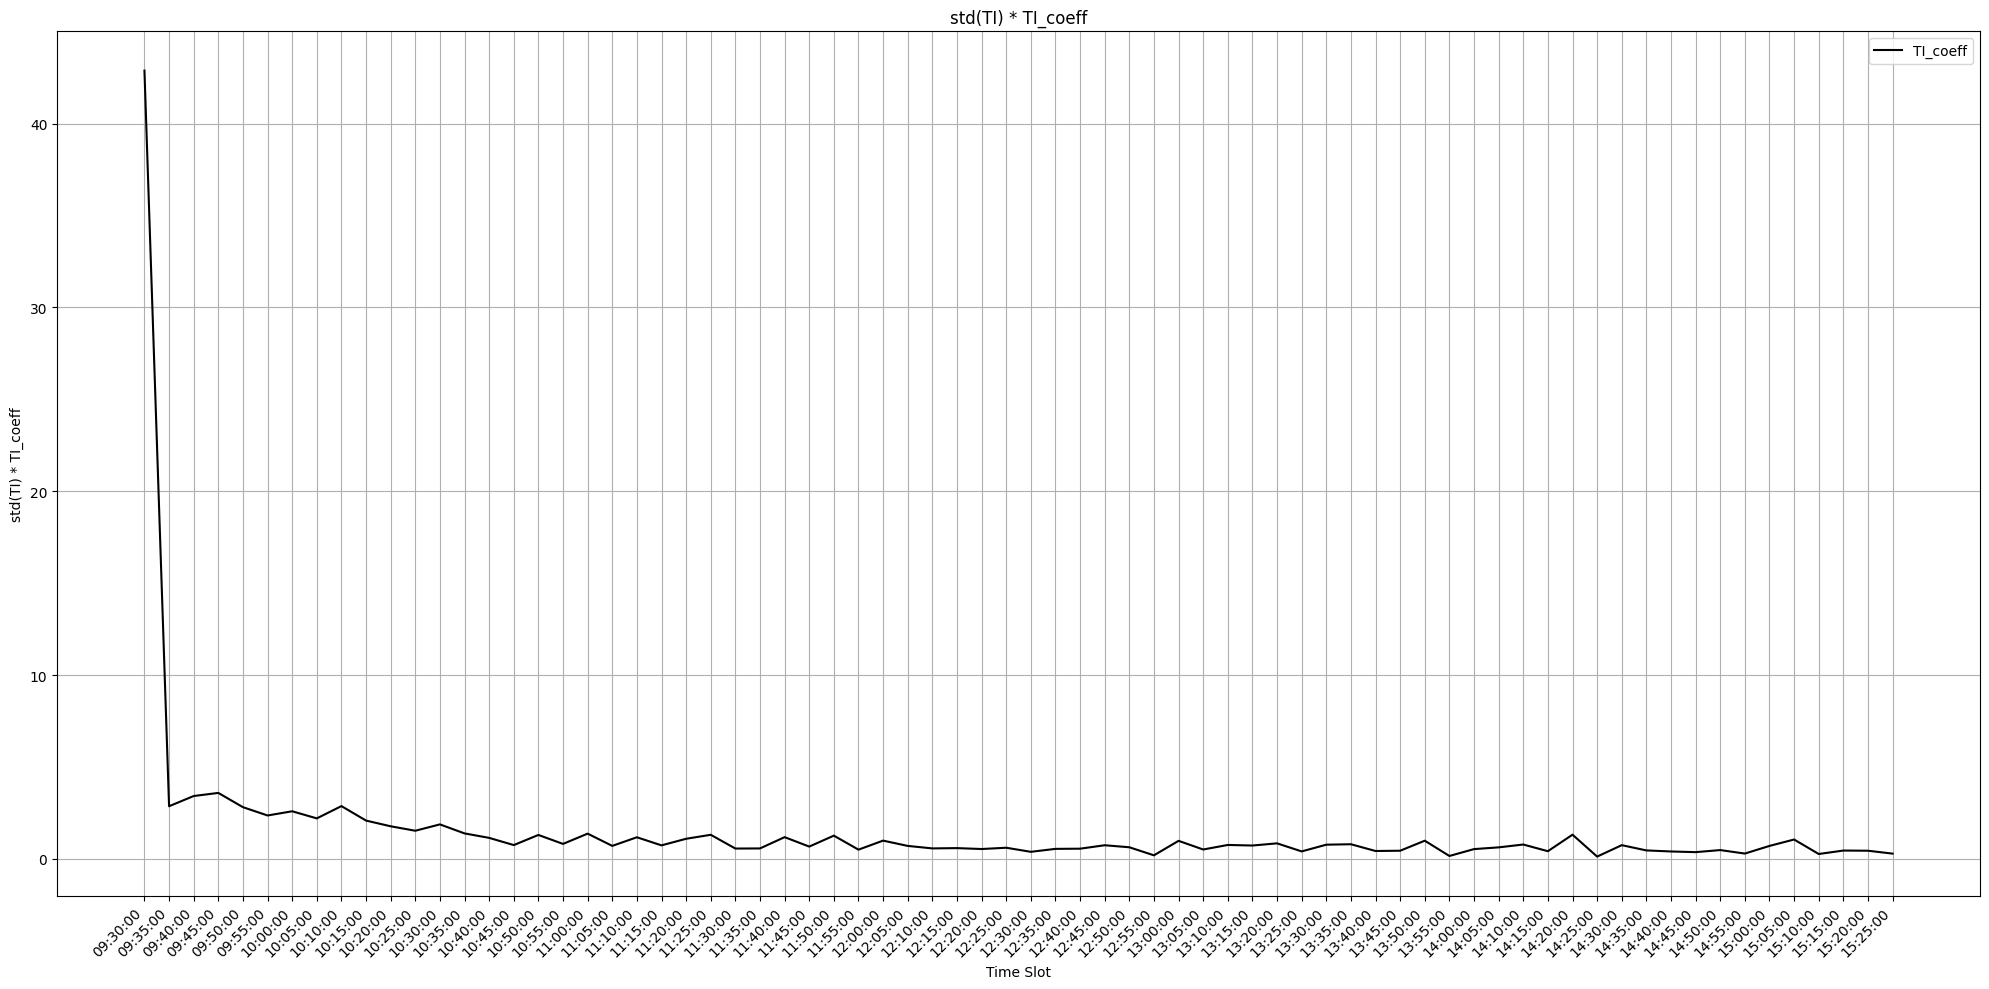

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(slots_stats[f'{slot_window}_slot'],
         slots_stats['std(TI)'] * coefficients_df['TI_coeff'],  # Changed to std(TI) * TI_coeff
         color='black',
         label='TI_coeff')

plt.title('std(TI) * TI_coeff')  # Updated title
plt.xlabel('Time Slot')
plt.ylabel('std(TI) * TI_coeff')  # Updated y-axis label
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
coefficients_df[f'{slot_window}_slot'] = coefficients_df[f'{slot_window}_slot'].astype(str)
quote_data_resampled_to_process[f'{slot_window}_slot'] = quote_data_resampled_to_process[f'{slot_window}_slot'].astype(str)

new_df = pd.merge(quote_data_resampled_to_process, coefficients_df, on=f'{slot_window}_slot', how='left').merge(slots_stats, on=f'{slot_window}_slot', how='left')
new_df

,DATETIME,M0,Mt,dp/tick,OFI,TRADE_IMBALANCE,5min_slot,intercept,OFI_coeff,TI_coeff,...,Std. Error Regression,OFI_lower_ci,OFI_upper_ci,TI_lower_ci,TI_upper_ci,std(OFI),mean(OFI),std(dp/tick),std(TI),mean(TI)
0,2024-10-28 09:30:00,233.345,168.580,-49550.0,82,1699644.0,09:30:00,0.262864,0.363514,0.000314,...,16.044471,0.345303,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368
1,2024-10-28 09:30:01,233.475,168.545,44112.5,414,-483708.0,09:30:00,0.262864,0.363514,0.000314,...,16.044471,0.345303,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368
2,2024-10-28 09:30:02,233.410,168.510,-88.5,-11,-884.0,09:30:00,0.262864,0.363514,0.000314,...,16.044471,0.345303,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368
3,2024-10-28 09:30:03,233.490,168.365,-106.0,-81,-342.0,09:30:00,0.262864,0.363514,0.000314,...,16.044471,0.345303,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368
4,2024-10-28 09:30:04,233.475,168.330,-22.5,-336,-53435.0,09:30:00,0.262864,0.363514,0.000314,...,16.044471,0.345303,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474094,2024-11-27 15:29:50,134.445,134.435,-2.0,-12,28.0,15:25:00,0.016002,0.151398,0.000182,...,1.997050,0.146843,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987
474095,2024-11-27 15:29:54,234.845,134.435,-4.5,-15,200.0,15:25:00,0.016002,0.151398,0.000182,...,1.997050,0.146843,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987
474096,2024-11-27 15:29:55,234.845,234.845,0.0,2,313.0,15:25:00,0.016002,0.151398,0.000182,...,1.997050,0.146843,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987
474097,2024-11-27 15:29:56,134.435,134.425,-1.0,-4,-845.0,15:25:00,0.016002,0.151398,0.000182,...,1.997050,0.146843,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987


In [ ]:
def convert_to_seconds(slot_window):
    """Converts a time string like '5min' or '10s' to seconds."""
    match = re.search(r'(\d+)([a-zA-Z]*)', slot_window)
    if match:
        value = int(match.group(1))
        unit = match.group(2).lower()
        if unit == 's':
            return value
        elif unit == 'min':
            return value * 60
        elif unit == 'h':
            return value * 3600
        else:
            raise ValueError("Invalid time unit: {}".format(unit))
    else:
        raise ValueError("Invalid time string format: {}".format(slot_window))

convert_to_seconds(slot_window)

300

In [ ]:
Q_total = 1200000      # Example: total shares to trade
C_fees_spread = 0.01   # Example: fees/spread

W = convert_to_seconds(slot_window)         # Window length in seconds
q = Q_total / W         # Shares traded each second


# Compute cost factors:
# For each row (second), cost contribution per second (inside the bracket):
# alpha_i + beta_i(OFI_i + delta*q) + C_fees_spread

new_df['cost_per_second'] = 0.01* (new_df['intercept'] + new_df['OFI_coeff']* q + new_df['TI_coeff']*q + (new_df['Mt'] - new_df['M0'])*q )
new_df['cost_penalty_second'] = new_df['cost_per_second'] + 0.01* 0.02*new_df['std(OFI)']**2
new_df

,DATETIME,M0,Mt,dp/tick,OFI,TRADE_IMBALANCE,5min_slot,intercept,OFI_coeff,TI_coeff,...,OFI_upper_ci,TI_lower_ci,TI_upper_ci,std(OFI),mean(OFI),std(dp/tick),std(TI),mean(TI),cost_per_second,cost_penalty_second
0,2024-10-28 09:30:00,233.345,168.580,-49550.0,82,1699644.0,09:30:00,0.262864,0.363514,0.000314,...,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368,15.809911,18.109797
1,2024-10-28 09:30:01,233.475,168.545,44112.5,414,-483708.0,09:30:00,0.262864,0.363514,0.000314,...,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368,15.809911,18.109797
2,2024-10-28 09:30:02,233.410,168.510,-88.5,-11,-884.0,09:30:00,0.262864,0.363514,0.000314,...,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368,15.809911,18.109797
3,2024-10-28 09:30:03,233.490,168.365,-106.0,-81,-342.0,09:30:00,0.262864,0.363514,0.000314,...,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368,15.809911,18.109797
4,2024-10-28 09:30:04,233.475,168.330,-22.5,-336,-53435.0,09:30:00,0.262864,0.363514,0.000314,...,0.381726,0.000184,0.000445,107.235391,-1.645030,2533.684595,136515.289221,523.663368,15.809911,18.109797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474094,2024-11-27 15:29:50,134.445,134.435,-2.0,-12,28.0,15:25:00,0.016002,0.151398,0.000182,...,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987,6.795743,6.883963
474095,2024-11-27 15:29:54,234.845,134.435,-4.5,-15,200.0,15:25:00,0.016002,0.151398,0.000182,...,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987,6.795743,6.883963
474096,2024-11-27 15:29:55,234.845,234.845,0.0,2,313.0,15:25:00,0.016002,0.151398,0.000182,...,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987,6.795743,6.883963
474097,2024-11-27 15:29:56,134.435,134.425,-1.0,-4,-845.0,15:25:00,0.016002,0.151398,0.000182,...,0.155953,0.000097,0.000268,21.002399,-0.192964,6.243291,1538.518167,-33.081987,6.795743,6.883963


In [ ]:
# We will sum over W seconds. To do this efficiently, use a rolling sum or a cumulative sum:
cumulative = new_df['cost_penalty_second'].cumsum()
cost = new_df['cost_per_second'].cumsum()

# Rolling sum for a window starting at i and spanning W entries:
# sum = cumulative[i+W-1] - cumulative[i-1] (handle indices carefully)
# We find minimal sum over all i that fit in the day
min_cost = float('inf')
best_start_index = None

for start_idx in range(len(new_df) - W + 1):
    end_idx = start_idx + W - 1
    window_sum = cumulative[end_idx] - (cumulative[start_idx-1] if start_idx > 0 else 0)
    window_sum_real_cost = cost[end_idx] - (cost[start_idx-1] if start_idx > 0 else 0)
    total_cost = q * window_sum
    total_cost_of_trade =  q * window_sum_real_cost
    if total_cost < min_cost:
        min_cost = total_cost
        min_true_cost =total_cost_of_trade
        best_start_index = start_idx

# Once we find the best start index:
best_start_time = new_df.loc[best_start_index, 'DATETIME']
best_end_time = new_df.loc[best_start_index + W - 1, 'DATETIME']

print("Best window starts at:", best_start_time, "ends at:", best_end_time)
# print("Minimum cost:", min_true_cost)

Best window starts at: 2024-10-31 14:54:59 ends at: 2024-10-31 14:59:59


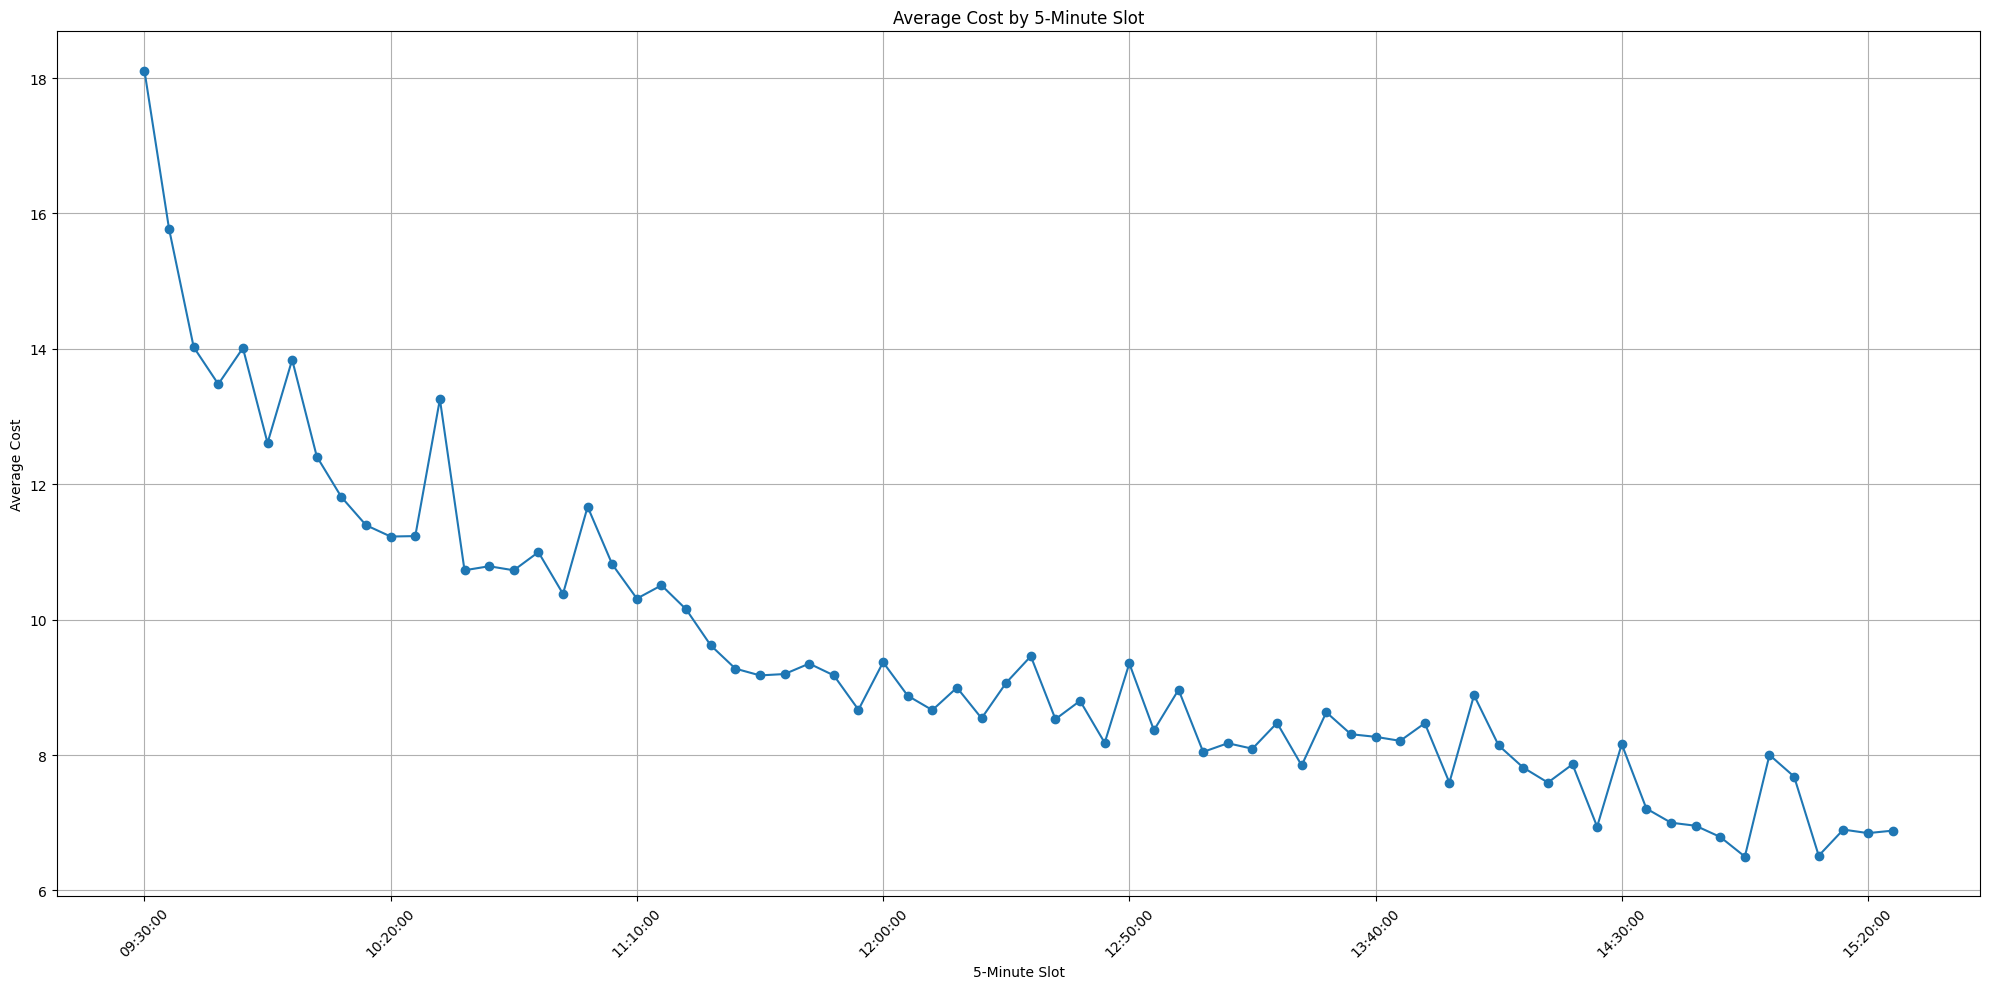

In [ ]:
# Example: Compute the average OFI for each 5-minute slot
cost = new_df.groupby(f'{slot_window}_slot')['cost_penalty_second'].mean()

# Plot the averaged OFI
plt.figure(figsize=(20, 10))
cost.plot(marker='o')
plt.title('Average Cost by 5-Minute Slot')
plt.xlabel('5-Minute Slot')
plt.ylabel('Average Cost')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()